In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
import seaborn as sns
import cv2
import os
import sys
import dlib
from PIL import Image

2022-11-14 14:43:24.858635: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-14 14:43:24.956969: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-14 14:43:24.960385: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-14 14:43:24.960395: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [33]:
!pip install imutils

  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25836 sha256=7a3b4b196e4835884e933ad6615719ab4c01860bbd41a98c3833710777e3fc1b
  Stored in directory: /home/ad.rapidops.com/amit.parmar/.cache/pip/wheels/4b/a5/2d/4a070a801d3a3d93f033d3ee9728f470f514826e89952df3ea
Successfully built imutils


In [50]:
detector = dlib.get_frontal_face_detector()
sp = dlib.shape_predictor('shape_predictor_5_face_landmarks.dat')
model = dlib.face_recognition_model_v1('dlib_face_recognition_resnet_model_v1.dat')

In [169]:
def main():
	i = 0
	path="Face Recognition_politician/rahul gandhi/"
	for filename in os.listdir(path):
		my_dest ="img" + str(i) + ".jpg"
		my_source =path + filename
		my_dest =path + my_dest
		# rename() function will
		# rename all the files
		os.rename(my_source, my_dest)
		i += 1
# Driver Code
if __name__ == '__main__':
	# Calling main() function
	main()

In [176]:
img_nm_path = "Face Recognition_politician/narendra modi/img1.jpg"
img_rg_path = "Face Recognition_politician/rahul gandhi/img6.jpg"
img_si_path = "Face Recognition_politician/smriti irani/img0.jpg"
img_nk_path = "Face Recognition_politician/nitish kumar/img8.jpg"
img_ay_path = "Face Recognition_politician/akhilesh yadav/img0.jpg"

In [177]:
img_nm = dlib.load_rgb_image(img_nm_path)
img_rg = dlib.load_rgb_image(img_rg_path)
img_si = dlib.load_rgb_image(img_si_path)
img_nk = dlib.load_rgb_image(img_nk_path)
img_ay = dlib.load_rgb_image(img_ay_path)

In [178]:
img_nm_detector = detector(img_nm, 1)
img_rg_detector = detector(img_rg, 1)
img_si_detector = detector(img_si, 1)
img_nk_detector = detector(img_nk, 1)
img_ay_detector = detector(img_ay, 1)

In [180]:
img_nm_shape = sp(img_nm, img_nm_detector[0])
img_rg_shape = sp(img_rg, img_rg_detector[0])
img_si_shape = sp(img_si, img_si_detector[0])
img_nk_shape = sp(img_nk, img_nk_detector[0])
img_ay_shape = sp(img_ay, img_ay_detector[0])

In [181]:
img_nm_aligned = dlib.get_face_chip(img_nm, img_nm_shape)
img_rg_aligned = dlib.get_face_chip(img_rg, img_rg_shape)
img_si_aligned = dlib.get_face_chip(img_si, img_si_shape)
img_nk_aligned = dlib.get_face_chip(img_nk, img_nk_shape)
img_ay_aligned = dlib.get_face_chip(img_ay, img_ay_shape)

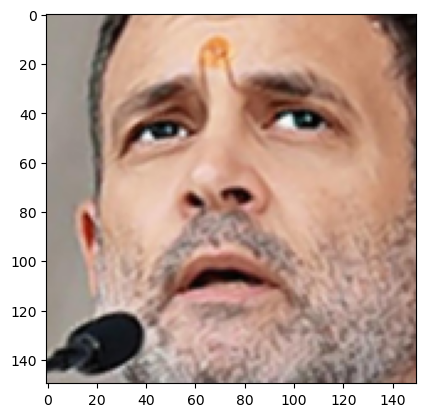

In [183]:
plt.imshow(img_nm_aligned)
plt.imshow(img_rg_aligned)

In [184]:
img_nm_representation = model.compute_face_descriptor(img_nm_aligned)
img_rg_representation = model.compute_face_descriptor(img_rg_aligned)
img_si_representation = model.compute_face_descriptor(img_si_aligned)
img_nk_representation = model.compute_face_descriptor(img_nk_aligned)
img_ay_representation = model.compute_face_descriptor(img_ay_aligned)

In [185]:
type(img_nm_representation)

_dlib_pybind11.vector

In [186]:
img_nm_representation = np.array(img_nm_representation)
img_rg_representation = np.array(img_rg_representation)
img_si_representation = np.array(img_si_representation)
img_nk_representation = np.array(img_nk_representation)
img_ay_representation = np.array(img_ay_representation)

In [187]:
type(img_nm_representation)

numpy.ndarray

In [191]:
img_nm_representation = np.array(img_nm_representation)
img_rg_representation = np.array(img_rg_representation)
img_si_representation = np.array(img_si_representation)
img_nk_representation = np.array(img_nk_representation)
img_ay_representation = np.array(img_ay_representation)

threshold=0.6

'''nm_dist=0
rg_dist=0
si_dist=0
nk_dist=0
ay_dist=0'''

def cal_dist(new_img_path):
    new_img = dlib.load_rgb_image(new_img_path)
    new_img_detector = detector(new_img, 1)
    new_img_shape = sp(new_img, new_img_detector[0])
    new_img_aligned = dlib.get_face_chip(new_img, new_img_shape)
    new_img_representation = model.compute_face_descriptor(new_img_aligned)
    new_img_representation = np.array(new_img_representation)
    
    nm_dist = np.sqrt(np.sum(np.square(new_img_representation - img_nm_representation)))
    rg_dist = np.sqrt(np.sum(np.square(new_img_representation - img_rg_representation)))
    si_dist = np.sqrt(np.sum(np.square(new_img_representation - img_si_representation)))
    nk_dist = np.sqrt(np.sum(np.square(new_img_representation - img_nk_representation)))
    ay_dist = np.sqrt(np.sum(np.square(new_img_representation - img_ay_representation)))
    
    if(nm_dist<threshold):
        print("Narendra Modi")
    elif(rg_dist<threshold):
        print("Rahul Gandhi")
    elif(si_dist<threshold):
        print("Smriti Irani")
    elif(nk_dist<threshold):
        print("Nitish Kumar")
    elif(ay_dist<threshold):
        print("Akhilesh Yadav")
    

In [192]:
cal_dist("Face Recognition_politician/narendra modi/img56.jpg")

Narendra Modi


In [205]:
cal_dist("Face Recognition_politician/rahul gandhi/img9.jpg")

Rahul Gandhi


In [194]:
cal_dist("Face Recognition_politician/nitish kumar/img56.jpg")

Nitish Kumar


In [206]:
cal_dist("Face Recognition_politician/akhilesh yadav/img5.jpg")

Akhilesh Yadav


In [221]:
cal_dist("Face Recognition_politician/smriti irani/img65.jpg")

Smriti Irani


AttributeError: '_dlib_pybind11.face_recognition_model_v1' object has no attribute 'score'